In [10]:
# GHOST - Euler Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 2

# geometry mapping degree (isoparametric)
p_geo = p

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_L10_x_11y_11.msh")

filename= "p" + str(p) + "c0t1"

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,10.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,10.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2, L=10.0), p_geo=p_geo)


# solver parameters
params_strong = {"project_title": filename + "_strong",
         "problem": "compressible_euler",
         "specific_heat_ratio": 1.4,
         "numerical_flux": "roe",
         "initial_condition": "isentropic_vortex",
         "vortex_type": "spiegel",
         "initial_vortex_centre": np.array([5.0,5.0]),
         "mach_number": 0.4,
         "angle": np.pi/4.,
         "integration_type": "collocation",
         "solution_degree": p,
         "volume_collocation_degree": p,
         "facet_collocation_degree": p,
         "solution_representation": "nodal",
         "form": "strong",
         "time_integrator": "rk44",
         "final_time": 0.005,
         "time_step_scale": 0.005}

strong = Solver(params_strong,mesh)

params_weak = params_strong.copy()
params_weak["project_title"] = filename + "_weak"
params_weak["form"] = "weak"
weak = Solver(params_weak,mesh)

In [11]:
strong.run(write_interval=0.01)
strong.post_process(error_quadrature_degree=4*p)

dt =  0.0007142857142857143
writing every  14  time steps, total  7
writing time step  7 : t =  0.005
max:  11.825804208635113


In [3]:
weak.run(write_interval=0.01)
weak.post_process(error_quadrature_degree=4*p)

dt =  0.0005
writing every  20  time steps, total  20000
writing time step  20 : t =  0.010000000000000005
max:  23.604479551580003
writing time step  40 : t =  0.020000000000000014
max:  23.68515967393097
writing time step  60 : t =  0.030000000000000023
max:  23.747569404948717
writing time step  80 : t =  0.04000000000000003
max:  23.793684994818634
writing time step  100 : t =  0.05000000000000004
max:  23.83053133317271
writing time step  120 : t =  0.060000000000000046
max:  23.969764085866217
writing time step  140 : t =  0.07000000000000005
max:  24.070715096679187
writing time step  160 : t =  0.08000000000000006
max:  24.129622101559015
writing time step  180 : t =  0.09000000000000007
max:  24.145803885135347
writing time step  200 : t =  0.10000000000000007
max:  24.120514738796913
writing time step  220 : t =  0.11000000000000008
max:  24.115653653112318
writing time step  240 : t =  0.12000000000000009
max:  24.105195006775872
writing time step  260 : t =  0.1300000000000

writing time step  2220 : t =  1.1099999999999333
max:  25.532216763629503
writing time step  2240 : t =  1.1199999999999322
max:  25.650990562474483
writing time step  2260 : t =  1.129999999999931
max:  25.71175470763462
writing time step  2280 : t =  1.13999999999993
max:  25.732164858699175
writing time step  2300 : t =  1.1499999999999289
max:  25.715277617018515
writing time step  2320 : t =  1.1599999999999278
max:  25.66494659029865
writing time step  2340 : t =  1.1699999999999267
max:  25.58766126634708
writing time step  2360 : t =  1.1799999999999256
max:  25.60606308816027
writing time step  2380 : t =  1.1899999999999245
max:  25.67740803667132
writing time step  2400 : t =  1.1999999999999234
max:  25.716794608299384
writing time step  2420 : t =  1.2099999999999222
max:  25.72683581632331
writing time step  2440 : t =  1.2199999999999211
max:  25.710614619179534
writing time step  2460 : t =  1.22999999999992
max:  25.671514430267248
writing time step  2480 : t =  1.239

KeyboardInterrupt: 

In [ ]:
for e in range(0,4):
    print("{:.3e}".format(strong.calculate_difference(weak)[e]), "& ", 
          "{:.3e}".format((strong.I_f - strong.I_0)[e]), "& ", 
          "{:.3e}".format((weak.I_f - weak.I_0)[e]), "& ", 
    "{:.3e}".format(strong.calculate_error()[e]), "& ",
    "{:.3e}".format(weak.calculate_error()[e]), " \\\\")
    

In [4]:
strong.I_f - strong.I_0

array([ 2.41584530e-13, -1.33582034e-12,  3.15480975e-12,  3.63797881e-12])

In [5]:
strong.calculate_error()

array([ 0.61609021,  0.89244755,  0.86546064, 18.86508121])

In [19]:
strong.u_hvmax

[1.0266904623908901,
 1.5377785647790305,
 0.6326692433816843,
 12.364881798905303]

In [26]:
strong.u_hvmin
strong.u_hv_global[2]

array([ 7.34556705e-08, -2.78068332e-07,  5.41653876e-09, ...,
        4.71824853e-09, -3.00132249e-09,  1.70674633e-08])

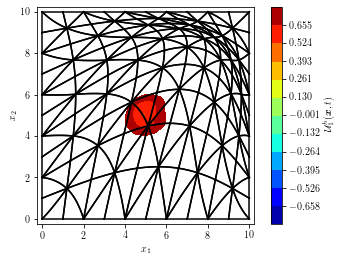

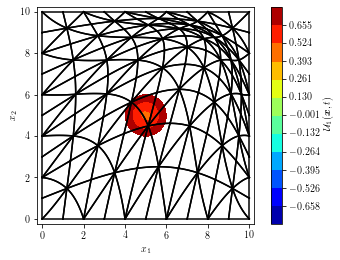

In [23]:
e=2
strong.plot(u_range=[min(strong.u_hvmin[2],strong.u_vmin[2]), max(strong.u_hvmax[2], strong.u_vmax[2])])